In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dfwh=pd.read_csv(r"C:\Users\91918\OneDrive\Desktop\ML datasets\weight-height.csv")

In [10]:
dfwh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
dfwh.shape

(10000, 3)

In [12]:
dfwh.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [13]:
dfwh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Feature Selection

In [14]:
dfwh.drop("Gender", axis = 1)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [15]:
dfwh.drop("Gender", axis = 1, inplace = True)

In [16]:
dfwh.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


NaNs

In [17]:
dfwh.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [18]:
dfwh.isnull().sum()

Height    0
Weight    0
dtype: int64

Error Detection

In [20]:
dfwh

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


<Axes: >

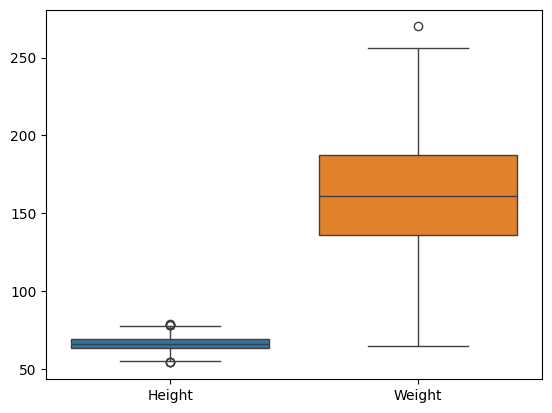

In [21]:
sns.boxplot(dfwh)

In [22]:
dfwh["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

<Axes: ylabel='Height'>

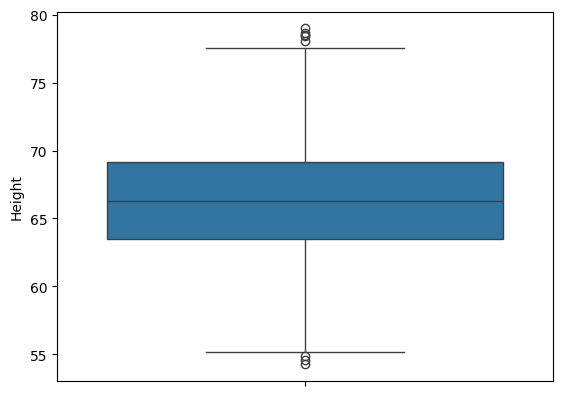

In [23]:
sns.boxplot(dfwh["Height"])

<Axes: ylabel='Weight'>

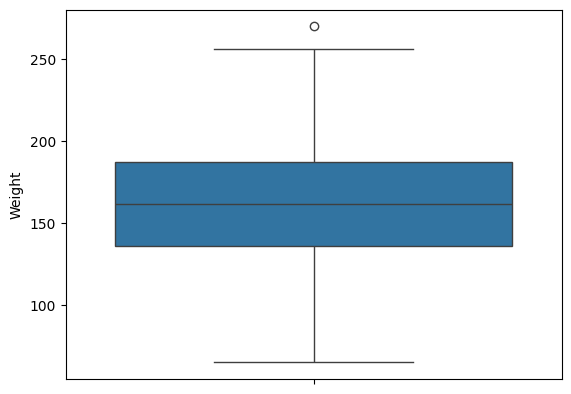

In [24]:
sns.boxplot(dfwh["Weight"])

In [25]:
dfwh["Weight"]

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

### Identify Errors in Height Column

In [26]:
dfwh["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [27]:
q1=(dfwh["Height"]).quantile(0.25)

In [28]:
q1

np.float64(63.505620481218955)

In [29]:
q3=(dfwh["Height"]).quantile(0.75)

In [30]:
q3

np.float64(69.1742617268347)

In [31]:
iqr=q3-q1

In [32]:
iqr

np.float64(5.668641245615746)

In [33]:
lower=q1-(1.5*iqr)

In [34]:
lower

np.float64(55.00265861279534)

In [35]:
upper=q1+(1.5*iqr)

In [36]:
upper

np.float64(72.00858234964258)

In [37]:
dfwh["Height"]<lower

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [38]:
dfwh[dfwh["Height"]<lower]

,Height,Weight
6624,54.616858,71.393749
7294,54.873728,78.606670
9285,54.263133,64.700127


In [39]:
dfwh["Height"]>upper

0        True
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [40]:
dfwh[dfwh["Height"]>upper]

,Height,Weight
0,73.847017,241.893563
2,74.110105,212.740856
16,72.418317,196.028506
23,75.205974,228.761781
27,72.800844,206.828189
...,...,...
4994,73.092871,193.944181
7162,72.429771,177.969532
7311,73.389586,190.078729
7856,72.264748,188.437304


In [41]:
dfwh[(dfwh["Height"]<lower)  |   (dfwh["Height"]>upper)]

,Height,Weight
0,73.847017,241.893563
2,74.110105,212.740856
16,72.418317,196.028506
23,75.205974,228.761781
27,72.800844,206.828189
...,...,...
7294,54.873728,78.606670
7311,73.389586,190.078729
7856,72.264748,188.437304
8635,72.088712,192.530863


Capping

In [42]:
dfwh["Height"].map(lambda x: lower if x<lower else upper if x>upper else x)

0       72.008582
1       68.781904
2       72.008582
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [43]:
dfwh["Height"]=dfwh["Height"].map(lambda x: lower if x<lower else upper if x>upper else x)

In [49]:
dfwh[ (dfwh["Height"] < lower) | (dfwh["Height"] > upper) ]

,Height,Weight


<Axes: ylabel='Height'>

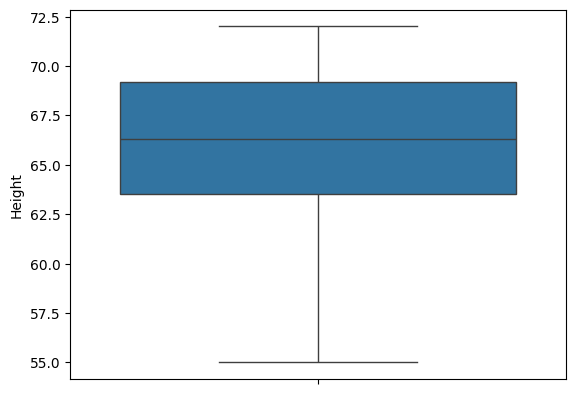

In [50]:
sns.boxplot(dfwh["Height"])

### Weight Columns

<Axes: ylabel='Weight'>

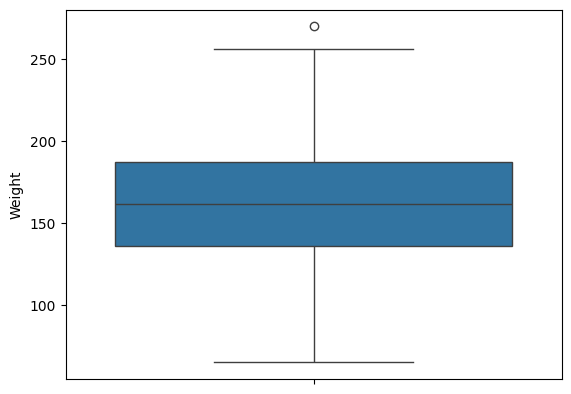

In [51]:
sns.boxplot(dfwh["Weight"])

In [52]:
q11=(dfwh["Weight"]).quantile(0.25)

In [53]:
q11

np.float64(135.8180513055015)

In [54]:
q33=(dfwh["Weight"]).quantile(0.75)

In [55]:
q33

np.float64(187.16952486868348)

In [56]:
iqr1=q33-q11

In [57]:
iqr1

np.float64(51.35147356318197)

In [58]:
lower1=q11-(1.5*iqr1)

In [59]:
lower1

np.float64(58.79084096072856)

In [60]:
upper1=q33+(1.5*iqr1)

In [61]:
upper1

np.float64(264.19673521345646)

In [62]:
dfwh["Weight"]<lower1

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Weight, Length: 10000, dtype: bool

In [63]:
dfwh[dfwh["Weight"]<lower1]

,Height,Weight


In [64]:
dfwh["Weight"]>upper1

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Weight, Length: 10000, dtype: bool

In [65]:
dfwh[dfwh["Weight"]>upper1]

,Height,Weight
2014,72.008582,269.989699


In [66]:
dfwh[(dfwh["Weight"]<lower1 ) |  (dfwh["Weight"]>upper1)]

,Height,Weight
2014,72.008582,269.989699


In [67]:
dfwh["Weight"]=dfwh["Weight"].map(lambda x: lower1 if x<lower1 else upper1 if x>upper1 else x)

<Axes: ylabel='Weight'>

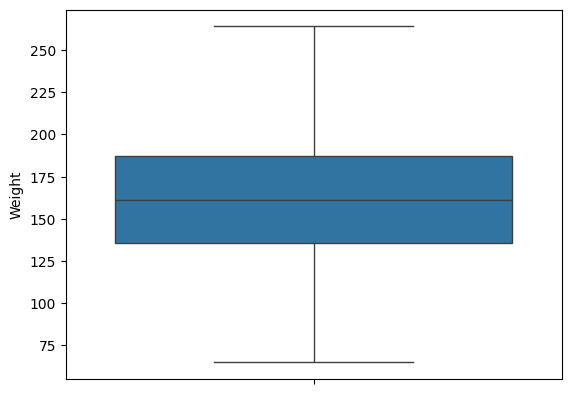

In [68]:
sns.boxplot(dfwh["Weight"])

In [69]:
dfwh

,Height,Weight
0,72.008582,241.893563
1,68.781904,162.310473
2,72.008582,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


Encoding

In [70]:
dfwh

,Height,Weight
0,72.008582,241.893563
1,68.781904,162.310473
2,72.008582,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


dfwh.dtypes

Data Seperation

In [71]:
X=dfwh[["Height"]]

In [72]:
X

,Height
0,72.008582
1,68.781904
2,72.008582
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [73]:
y=dfwh["Weight"]

In [74]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

### Data Splitting 

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [77]:
X_train.shape

(8000, 1)

In [78]:
y_train.shape

(8000,)

In [79]:
X_test.shape

(2000, 1)

In [80]:
y_test.shape

(2000,)

In [81]:
X.shape

(10000, 1)

In [82]:
y.shape

(10000,)

### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr=LinearRegression()

In [85]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
lr.score(X_test,y_test)

0.8344232290265347

### Auto Random State

In [88]:
for i in range(500):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [89]:
sc_list=[]
for i in range(500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
    linreg=LinearRegression()
    linreg.fit(X_train,y_train)
    sc=linreg.score(X_test,y_test)
    sc_list.append(sc)
m=max(sc_list)
print(m)
sc_list.index(m)


0.8616850280870236


190

In [90]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [91]:
lr.predict(X_test)

array([100.74785059, 156.30363795, 136.13624307, ..., 197.18789472,
       159.40930887, 184.61560473], shape=(2000,))

In [92]:
y_pred=lr.predict(X_test)

In [93]:
y_pred

array([100.74785059, 156.30363795, 136.13624307, ..., 197.18789472,
       159.40930887, 184.61560473], shape=(2000,))

In [94]:
y_test

7996    103.537756
9586    157.834902
5617    134.749661
4573    169.315687
8840    145.519024
           ...    
261     181.644445
596     174.566856
1755    205.817296
9818    154.288974
3412    190.692105
Name: Weight, Length: 2000, dtype: float64

In [95]:
y_pred

array([100.74785059, 156.30363795, 136.13624307, ..., 197.18789472,
       159.40930887, 184.61560473], shape=(2000,))

In [96]:
r2_score(y_test,y_pred)

0.8484508079605432

In [97]:
mean_squared_error(y_test,y_pred)

153.1984929630832

In [98]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(12.37733787868309)

In [99]:
100-np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(87.6226621213169)

In [100]:
np.sqrt(mean_absolute_error(y_test,y_pred))

np.float64(3.1419259376415116)

In [101]:
100-np.sqrt(mean_absolute_error(y_test,y_pred))

np.float64(96.85807406235848)